In [ ]:
import pandas as pd 
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
uploaded = files.upload()
df = pd.read_excel('superstore_sales.xlsx')
df.head()

Saving superstore_sales.xlsx to superstore_sales.xlsx


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [ ]:
#Shape of dataset
df.shape

(51290, 21)

In [ ]:
#Columns present in dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [ ]:
#Sumary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [ ]:
# Check for missing data
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [ ]:
# Statistics
df.describe()


,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Question 1 : What is the overall sales trend ?

In [ ]:
#Exploratory data analysis
df['order_date'].min()


Timestamp('2014-12-31 00:00:00')

In [ ]:
df['order_date'].max()


Timestamp('2014-12-31 00:00:00')

In [ ]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [ ]:
df_trend = df.groupby('month_year').sum()['sales'].reset_index()
df_trend

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


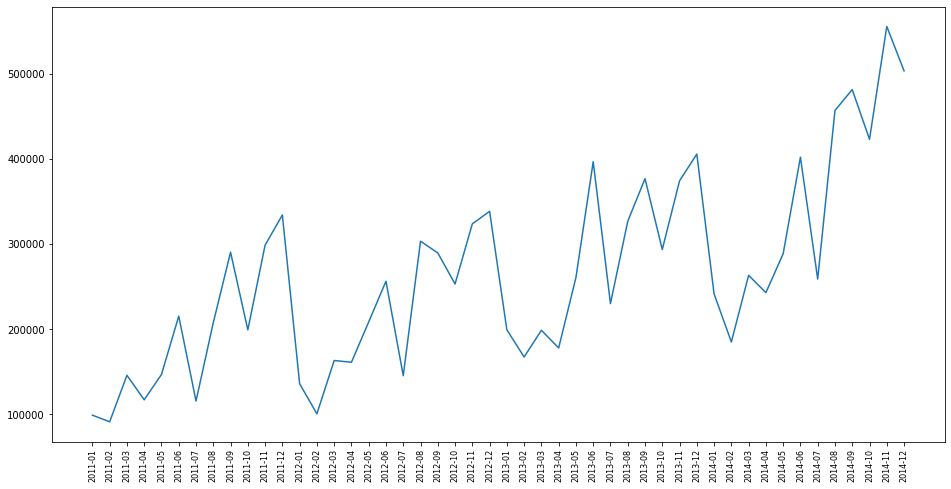

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.xticks(rotation='vertical',size=8)
plt.show()

# Question 2 : Wich are the top 10 products by sales ?

In [ ]:
df_top_tenProducts = df.groupby('product_name').sum()['sales'].reset_index().sort_values(by='sales',ascending = False)
df_top_tenProducts

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...,...
438,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.7000
1641,Grip Seal Envelopes,7.0720
3707,Xerox 20,6.4800
373,Avery 5,5.7600


In [ ]:
df_top_tenProducts[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


## Question 3 : wich are the most selling products ?

In [ ]:
df_mostSellingProducts = df.groupby('product_name').sum()['quantity'].reset_index().sort_values(by='quantity',ascending=False)
df_mostSellingProducts 

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
...,...,...
2734,Penpower WorldCard Pro Card Scanner,1
797,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
679,Boston 1900 Electric Pencil Sharpener,1
3707,Xerox 20,1


In [ ]:
df_mostSellingProducts[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


# Question 4 : What is the most prefered ship mode?

In [ ]:
df.groupby('ship_mode').count()


,order_id,order_date,ship_date,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
ship_mode,,,,,,,,,,,,,,,,,,,,,
First Class,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505
Same Day,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
Second Class,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309
Standard Class,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


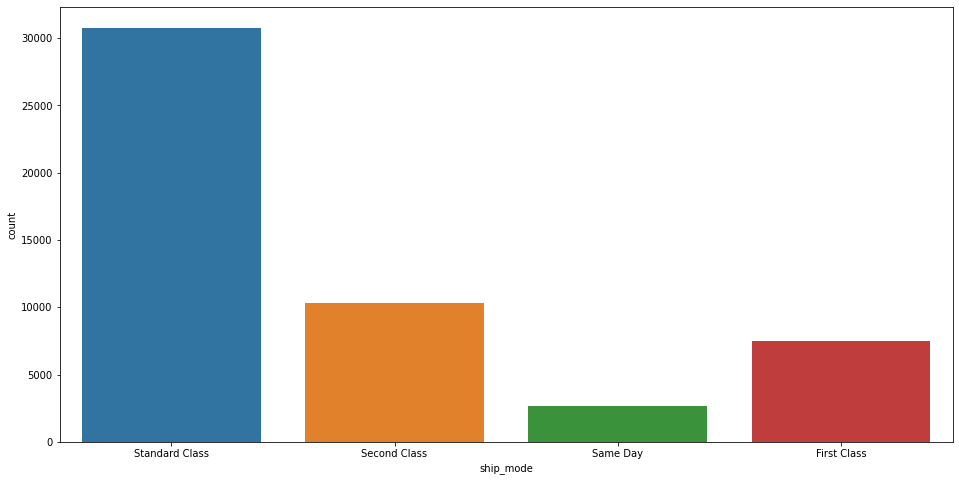

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(df['ship_mode'])

# Question  5 : wich are the most profitable category and sub_category ?

In [ ]:
df.groupby(['category','sub_category']).sum()['profit'].reset_index()

,category,sub_category,profit
0,Furniture,Bookcases,161924.41950
1,Furniture,Chairs,141973.79750
2,Furniture,Furnishings,46967.42550
3,Furniture,Tables,-64083.38870
4,Office Supplies,Appliances,141680.58940
5,Office Supplies,Art,57953.91090
6,Office Supplies,Binders,72449.84600
7,Office Supplies,Envelopes,29601.11630
8,Office Supplies,Fasteners,11525.42410
9,Office Supplies,Labels,15010.51200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


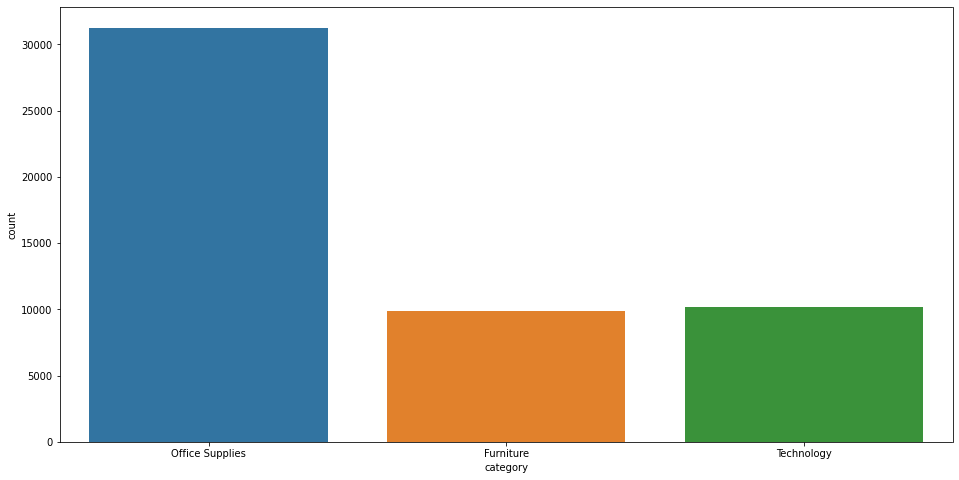

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(df['category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


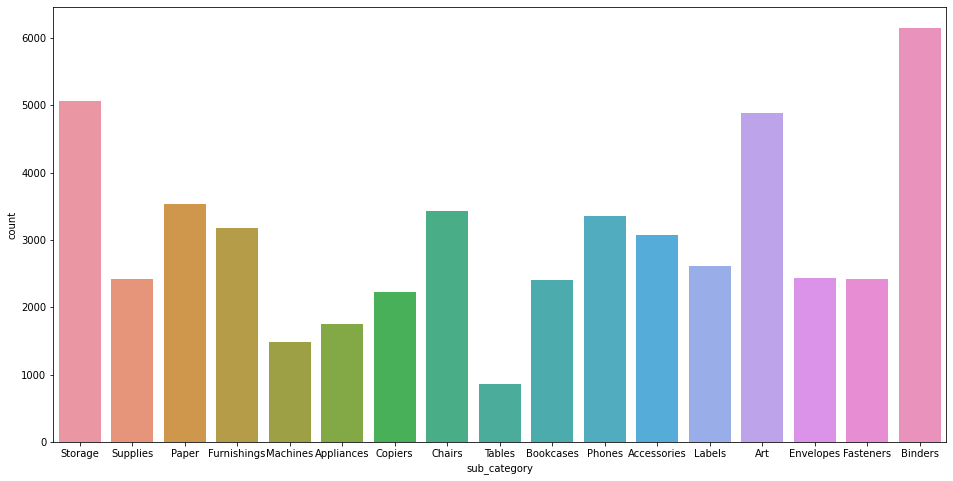

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(df['sub_category'])